## Time series prediction

Implemented a Deep Recurrent Neural Network for time series prediction (RNN regression), using Keras.

- Worked with Google's stock, predicting the opening price.
- Preprocessed the data, having the opening price of each day to be the label of the previous 60 days, in order to create training instances.
- Built the RNN model using LSTM layers.

In [ ]:
# Kalliopi Tsolaki, AEM 20
# MSc Digital Media & Computational Intelligence
# Deep Learning
# Project 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[: , 1:2].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [13]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train) 
y_train = np.array(y_train) 


In [5]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy', 'mse'])

In [ ]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

In [10]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[: , 1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [12]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)  
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [13]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<function matplotlib.pyplot.show(*args, **kw)>

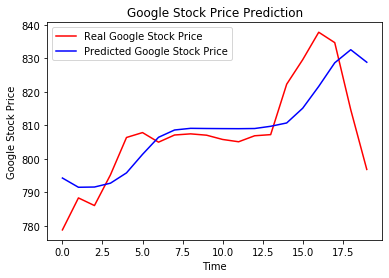

In [14]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show